In [1]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk

import matplotlib.pyplot as plt

from collections import Counter
from xmltodict import parse
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from  nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

# Unstructured Data (Part II)

## Text Data

We worked with unstructured data in the form of images in [Lecture 6](https://github.com/kaygun/2022-Fall-381E/blob/main/lecture-06.ipynb). Today, we are going to look at another type of untructured data: text data.

There is a deluge of text data out in the world, and we can use them to extract insights about people or organizations that produced them. Here are some of the things you can do with data:

1. frequency analysis
1. keyword extraction
2. named entity recognition
3. sentiment analysis
4. summarization
5. author attribution
6. automated translation


## Text Scraping

### Atatürk'ün Gençliğe Hitabesi

So far, the data we needed was available through API's or as separate data files. But for text data, most of the time we are going to have to extract it from where ever it is published. For example, the text you see in a web page has to be extracted. This is because the text part of a web page is only a small portion of it. Here is an example: [Atatürk'ün Gençliğe Hitabesi](https://www.tdk.gov.tr/genel/ataturkun-genclige-hitabesi) is a short text published by [Türk Dil Kurumu](https://www.tdk.gov.tr). But the text itself is a very small part of the raw HTML file that contains the text:

In [40]:
with requests.get('https://www.tdk.gov.tr/genel/ataturkun-genclige-hitabesi/') as link:
    raw = BeautifulSoup(link.content,'html.parser')

raw

<!DOCTYPE html>

<html lang="tr">
<head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=1" name="viewport"/>
<title>Atatürk’ün Gençliğe Hitabesi – Türk Dil Kurumu</title>
<meta content="max-image-preview:large" name="robots"/>
<link href="//cdnjs.cloudflare.com" rel="dns-prefetch"/>
<link href="//use.fontawesome.com" rel="dns-prefetch"/>
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://www.tdk.gov.tr/feed/" rel="alternate" title="Türk Dil Kurumu » beslemesi" type="application/rss+xml"/>
<link href="https://www.tdk.gov.tr/comments/feed/" rel="alternate" title="Türk Dil Kurumu » yorum beslemesi" type="application/rss+xml"/>
<script type="text/javascript">
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/svg\/","svgExt":".svg","s

The part of the text we would like extract is put in a div class called "page-content content". We extracted as follows.

In [41]:
text = raw.find('div', attrs={'class':"page-content content"}).text
text

'\n\n\n\xa0 \xa0ATATÜRK’ÜN GENÇLİĞE HİTABESİ\n\n\xa0\xa0 Ey Türk gençliği! Birinci vazifen; Türk istiklalini, Türk cumhuriyetini, ilelebet muhafaza ve müdafaa etmektir.\n\xa0 \xa0Mevcudiyetinin ve istikbalinin yegâne temeli budur. Bu temel, senin en kıymetli hazinendir. İstikbalde dahi seni bu hazineden mahrum etmek isteyecek dâhilî ve haricî bedhahların olacaktır. Bir gün, istiklal ve cumhuriyeti müdafaa mecburiyetine düşersen, vazifeye atılmak için içinde bulunacağın vaziyetin imkân ve şeraitini düşünmeyeceksin. Bu imkân ve şerait, çok namüsait bir mahiyette tezahür edebilir. İstiklal ve cumhuriyetine kastedecek düşmanlar, bütün dünyada emsali görülmemiş bir galibiyetin mümessili olabilirler. Cebren ve hile ile aziz vatanın bütün kaleleri zapt edilmiş, bütün tersanelerine girilmiş, bütün orduları dağıtılmış ve memleketin her köşesi bilfiil işgal edilmiş olabilir. Bütün bu şeraitten daha elim ve daha vahim olmak üzere, memleketin dâhilinde iktidara sahip olanlar, gaflet ve dalalet ve 

This choice is not universal. For every different site and page, you must first inspect the raw HTML file and then find out which part you need to extract. I'll show more examples below. 

Next, I am going to normalize the text: convert all upper case letters to lower case and then remote all non-letter characters. Finally, we split the text into words.

In [42]:
data = re.sub(r'[^\w\s]','',text.lower()).split()
data

['atatürkün',
 'gençli̇ğe',
 'hi̇tabesi̇',
 'ey',
 'türk',
 'gençliği',
 'birinci',
 'vazifen',
 'türk',
 'istiklalini',
 'türk',
 'cumhuriyetini',
 'ilelebet',
 'muhafaza',
 've',
 'müdafaa',
 'etmektir',
 'mevcudiyetinin',
 've',
 'istikbalinin',
 'yegâne',
 'temeli',
 'budur',
 'bu',
 'temel',
 'senin',
 'en',
 'kıymetli',
 'hazinendir',
 'i̇stikbalde',
 'dahi',
 'seni',
 'bu',
 'hazineden',
 'mahrum',
 'etmek',
 'isteyecek',
 'dâhilî',
 've',
 'haricî',
 'bedhahların',
 'olacaktır',
 'bir',
 'gün',
 'istiklal',
 've',
 'cumhuriyeti',
 'müdafaa',
 'mecburiyetine',
 'düşersen',
 'vazifeye',
 'atılmak',
 'için',
 'içinde',
 'bulunacağın',
 'vaziyetin',
 'imkân',
 've',
 'şeraitini',
 'düşünmeyeceksin',
 'bu',
 'imkân',
 've',
 'şerait',
 'çok',
 'namüsait',
 'bir',
 'mahiyette',
 'tezahür',
 'edebilir',
 'i̇stiklal',
 've',
 'cumhuriyetine',
 'kastedecek',
 'düşmanlar',
 'bütün',
 'dünyada',
 'emsali',
 'görülmemiş',
 'bir',
 'galibiyetin',
 'mümessili',
 'olabilirler',
 'cebren',
 'v

Above, I am using [regex](https://pypi.org/project/regex/) library of python which is an extension of the [re](https://docs.python.org/3/library/re.html) regular expression library. Text processing tasks require the use of [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) to find, remove, or replace parts of text that we process. It is a crucial tool that any data scientist or engineer must know how to use.

Next, let us count the distinct words:

In [43]:
res = Counter(data)
res

Counter({'atatürkün': 1,
         'gençli̇ğe': 1,
         'hi̇tabesi̇': 1,
         'ey': 2,
         'türk': 5,
         'gençliği': 1,
         'birinci': 1,
         'vazifen': 2,
         'istiklalini': 1,
         'cumhuriyetini': 2,
         'ilelebet': 1,
         'muhafaza': 1,
         've': 15,
         'müdafaa': 2,
         'etmektir': 1,
         'mevcudiyetinin': 1,
         'istikbalinin': 2,
         'yegâne': 1,
         'temeli': 1,
         'budur': 1,
         'bu': 6,
         'temel': 1,
         'senin': 1,
         'en': 1,
         'kıymetli': 1,
         'hazinendir': 1,
         'i̇stikbalde': 1,
         'dahi': 2,
         'seni': 1,
         'hazineden': 1,
         'mahrum': 1,
         'etmek': 1,
         'isteyecek': 1,
         'dâhilî': 1,
         'haricî': 1,
         'bedhahların': 1,
         'olacaktır': 1,
         'bir': 3,
         'gün': 1,
         'istiklal': 2,
         'cumhuriyeti': 1,
         'mecburiyetine': 1,
         'düşersen': 

As you can see, some words are repeated with different forms such as 'atatürk' and 'atatürkün', or 'istikbalinin' and 'istikbalde' etc. We need to normalize such words as well. This is called [stemming](https://en.wikipedia.org/wiki/Stemming). Stemming is a difficult task for [agglutinative languages](https://en.wikipedia.org/wiki/Agglutinative_language) such as [Turkish](https://en.wikipedia.org/wiki/Turkish_language), and require specialized tools.

In [44]:
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
res = Counter(cleaned)
dict(sorted(res.items(), key=lambda x: x[1], reverse=True))

{'ve': 15,
 'bu': 7,
 'türk': 5,
 'iç': 5,
 'büt': 5,
 'cumhuriyet': 4,
 'şerait': 4,
 'vazife': 3,
 'istiklal': 3,
 'bir': 3,
 'olabilir': 3,
 'atatürk': 2,
 'ey': 2,
 'müdafaa': 2,
 'etmek': 2,
 'istikbal': 2,
 'temel': 2,
 'se': 2,
 'hazine': 2,
 'dahi': 2,
 'imkân': 2,
 'edebilir': 2,
 'edil': 2,
 'memleket': 2,
 'dah': 2,
 'iktidar': 2,
 'sahip': 2,
 'hat': 2,
 'gençli̇ğe': 1,
 'hi̇tabesi̇': 1,
 'gençlik': 1,
 'birinci': 1,
 'ilelebet': 1,
 'muhafaz': 1,
 'mevcudiyet': 1,
 'yegâne': 1,
 'en': 1,
 'kıymetli': 1,
 'i̇stikbal': 1,
 'mahr': 1,
 'isteyecek': 1,
 'dâhilî': 1,
 'haricî': 1,
 'bedhah': 1,
 'olacak': 1,
 'gün': 1,
 'mecburiyet': 1,
 'düşer': 1,
 'atılmak': 1,
 'bulunacak': 1,
 'vaziyet': 1,
 'düşünmeyecek': 1,
 'çok': 1,
 'namüsait': 1,
 'mahiyet': 1,
 'tezahür': 1,
 'i̇stiklal': 1,
 'kastedecek': 1,
 'düşman': 1,
 'dünya': 1,
 'emsal': 1,
 'görülmemiş': 1,
 'galibiyet': 1,
 'mümessil': 1,
 'cebre': 1,
 'hil': 1,
 'il': 1,
 'aziz': 1,
 'vata': 1,
 'kale': 1,
 'zapt': 1,
 '

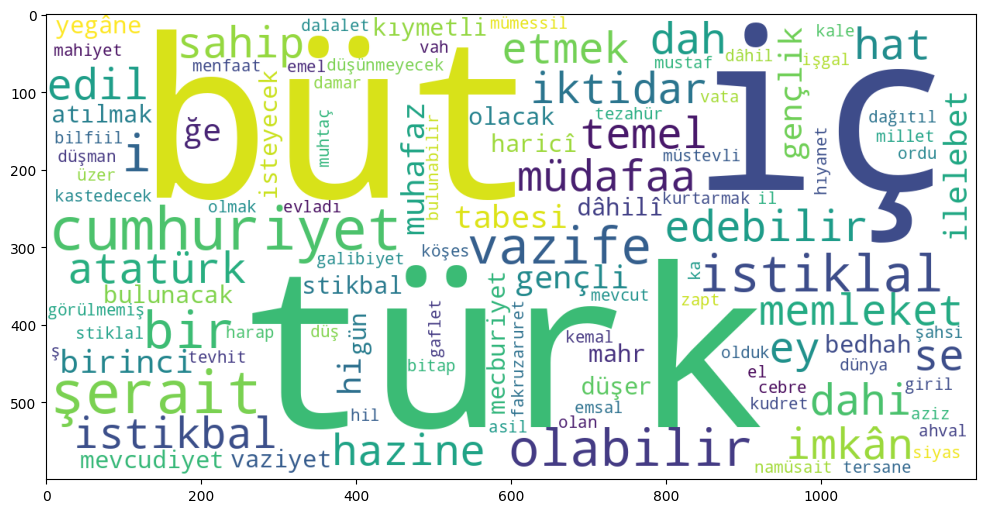

In [45]:
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

## Texts from the Gutenberg Project

The [Gutenberg Project](https://www.gutenberg.org/) aims to provide free access to texts which are in public domain. Today, I am going to process a [Mark Twain](https://en.wikipedia.org/wiki/Mark_Twain) novel: [Adventures of Huckleberry Finn](https://www.gutenberg.org/ebooks/76).


In [8]:
with requests.get('https://www.gutenberg.org/files/76/76-0.txt') as url:
    finn = url.content
    
finn

b'\xef\xbb\xbfThe Project Gutenberg eBook of Adventures of Huckleberry Finn, by Mark Twain (Samuel Clemens)\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Adventures of Huckleberry Finn\r\n\r\nAuthor: Mark Twain (Samuel Clemens)\r\n\r\nRelease Date: August, 1993 [eBook #76]\r\n[Most recently updated: February 21, 2021]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***\r\n\r\n\r\n\r\n\r\nADVENTURES\r\n\r\nOF\r\n\r\nHUCKLEBERRY FINN\r\n\r\n(Tom Sawy

In [9]:
finn[9762:12000]

b"CHAPTER I.\r\n\r\n\r\nYou don't know about me without you have read a book by the name of The\r\nAdventures of Tom Sawyer; but that ain't no matter. That book was made\r\nby Mr. Mark Twain, and he told the truth, mainly. There was things\r\nwhich he stretched, but mainly he told the truth. That is nothing. I\r\nnever seen anybody but lied one time or another, without it was Aunt\r\nPolly, or the widow, or maybe Mary. Aunt Polly--Tom's Aunt Polly, she\r\nis--and Mary, and the Widow Douglas is all told about in that book, which\r\nis mostly a true book, with some stretchers, as I said before.\r\n\r\nNow the way that the book winds up is this: Tom and me found the money\r\nthat the robbers hid in the cave, and it made us rich. We got six\r\nthousand dollars apiece--all gold. It was an awful sight of money when\r\nit was piled up. Well, Judge Thatcher he took it and put it out\r\nat interest, and it fetched us a dollar a day apiece all the year\r\nround--more than a body could tell what 

In [10]:
finn[591195:592000]

b'\r\n\r\n\r\n\r\n\r\n*** END OF THE PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***\r\n\r\n***** This file should be named 76-0.txt or 76-0.zip *****\r\nThis and all associated files of various formats will be found in:\r\n    https://www.gutenberg.org/7/76/\r\n\r\nUpdated editions will replace the previous one--the old editions will\r\nbe renamed.\r\n\r\nCreating the works from print editions not protected by U.S. copyright\r\nlaw means that no one owns a United States copyright in these works,\r\nso the Foundation (and you!) can copy and distribute it in the United\r\nStates without permission and without paying copyright\r\nroyalties. Special rules, set forth in the General Terms of Use part\r\nof this license, apply to copying and distributing Project\r\nGutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm\r\nconcept and t'

In [84]:
text = finn[9762:591195]

In [85]:
data = re.sub(r'[^\w\s]','',text.decode('utf8').lower())
len(data)

547359

In [52]:
tmp = data.split()
len(tmp)

110089

In [53]:
tmp

['chapter',
 'i',
 'you',
 'dont',
 'know',
 'about',
 'me',
 'without',
 'you',
 'have',
 'read',
 'a',
 'book',
 'by',
 'the',
 'name',
 'of',
 'the',
 'adventures',
 'of',
 'tom',
 'sawyer',
 'but',
 'that',
 'aint',
 'no',
 'matter',
 'that',
 'book',
 'was',
 'made',
 'by',
 'mr',
 'mark',
 'twain',
 'and',
 'he',
 'told',
 'the',
 'truth',
 'mainly',
 'there',
 'was',
 'things',
 'which',
 'he',
 'stretched',
 'but',
 'mainly',
 'he',
 'told',
 'the',
 'truth',
 'that',
 'is',
 'nothing',
 'i',
 'never',
 'seen',
 'anybody',
 'but',
 'lied',
 'one',
 'time',
 'or',
 'another',
 'without',
 'it',
 'was',
 'aunt',
 'polly',
 'or',
 'the',
 'widow',
 'or',
 'maybe',
 'mary',
 'aunt',
 'pollytoms',
 'aunt',
 'polly',
 'she',
 'isand',
 'mary',
 'and',
 'the',
 'widow',
 'douglas',
 'is',
 'all',
 'told',
 'about',
 'in',
 'that',
 'book',
 'which',
 'is',
 'mostly',
 'a',
 'true',
 'book',
 'with',
 'some',
 'stretchers',
 'as',
 'i',
 'said',
 'before',
 'now',
 'the',
 'way',
 'tha

In [54]:
dict(sorted(Counter(data.split()).items(),key = lambda x: x[1], reverse=True)[:100])

{'and': 6219,
 'the': 4763,
 'i': 3206,
 'a': 2905,
 'to': 2905,
 'it': 2273,
 'was': 2035,
 'he': 1648,
 'of': 1635,
 'in': 1422,
 'you': 1287,
 'that': 1044,
 'but': 1017,
 'so': 937,
 'on': 868,
 'we': 839,
 'for': 835,
 'all': 829,
 'up': 817,
 'out': 798,
 'me': 722,
 'him': 701,
 'they': 693,
 'says': 638,
 'got': 610,
 'then': 585,
 'there': 566,
 'no': 564,
 'his': 547,
 'as': 539,
 'with': 528,
 'them': 504,
 'she': 488,
 'said': 481,
 'see': 471,
 'down': 463,
 'had': 456,
 'well': 437,
 'when': 428,
 'about': 419,
 'at': 413,
 'my': 412,
 'what': 403,
 'would': 396,
 'if': 396,
 'by': 393,
 'come': 388,
 'one': 376,
 'do': 373,
 'be': 364,
 'her': 348,
 'didnt': 339,
 'get': 333,
 'dont': 329,
 'jim': 328,
 'time': 314,
 'or': 312,
 'is': 304,
 'could': 299,
 'went': 291,
 'right': 290,
 'warnt': 289,
 'aint': 284,
 'over': 281,
 'off': 280,
 'go': 272,
 'good': 271,
 'way': 264,
 'just': 260,
 'around': 259,
 'like': 258,
 'old': 256,
 'de': 250,
 'know': 249,
 'this': 244,

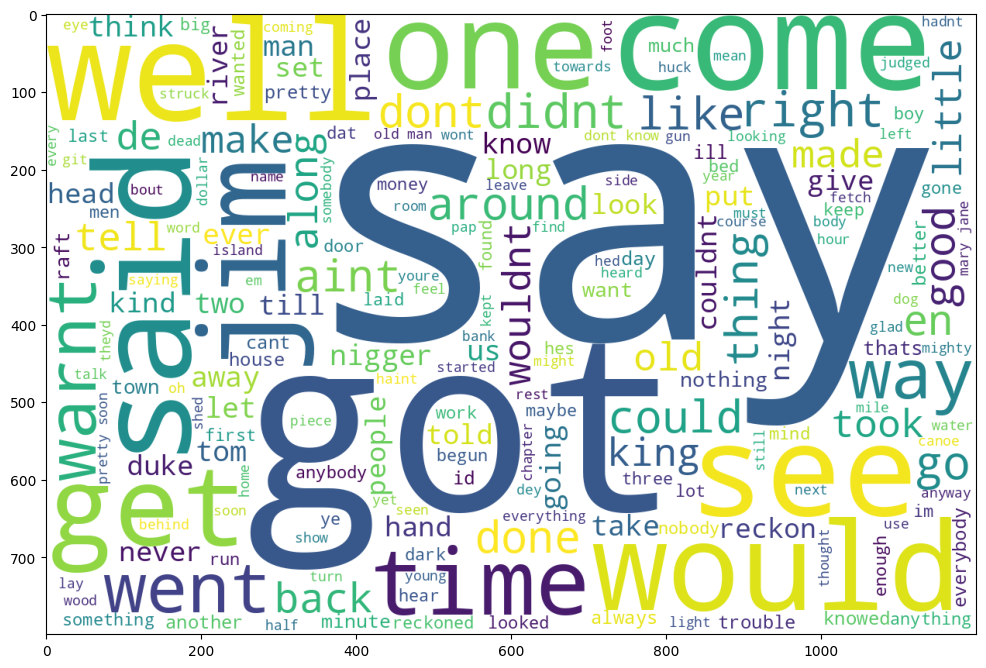

In [55]:
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 800,
                  background_color ='white',
                  stopwords = stopwords.words('english'),
                  min_font_size = 10)
plt.imshow(cloud.generate(data))

## More Examples 

Now, let me show you an example usage of standard linear algebra for language processing. We are going to extract keywords from a text using [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). Our first step is to get a sample text for which keywords do actually make sense. Such an example would be a news article:

In [56]:
with requests.get('https://www.theguardian.com/technology/2022/nov/24/elon-musk-offers-general-amnesty-to-suspended-twitter-accounts') as url:
    raw = BeautifulSoup(url.content,'html.parser')

sample = ' '.join([x.text for x in raw.find_all('p')])
sample

'Poll organised by new owner backed reopening accounts, leading to fears ‘superspreaders of hate’ will return to social media platform Elon Musk has announced a general amnesty for suspended Twitter accounts in a move that brought a warning that “superspreaders of hate” will return to the social media platform. Twitter’s new owner said an amnesty for blocked users would begin next week after a majority of votes in a poll on his account backed the move. Accounts suspended on Twitter include Donald Trump’s former adviser Steve Bannon, rightwing UK commentator Katie Hopkins and David Duke, the former Ku Klux Klan grand wizard. Musk had launched a poll on Wednesday asking if a general amnesty should be offered to accounts provided they have not “broken the law or engaged in egregious spam”. Musk did not specify which laws he meant. More than 3.1m votes were recorded by the poll, with 72% in favour of an amnesty. Should Twitter offer a general amnesty to suspended accounts, provided that th

In [57]:
raw

<!DOCTYPE html>

<html lang="en">
<head>
<!--

We are hiring, ever thought about joining us?
https://workforus.theguardian.com/careers/product-engineering/


                                    GGGGGGGGG
                           GGGGGGGGGGGGGGGGGGGGGGGGGG
                       GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
                    GGGGGGGGGGGGGGGGG      GG   GGGGGGGGGGGGG
                  GGGGGGGGGGGG        GGGGGGGGG      GGGGGGGGGG
                GGGGGGGGGGG         GGGGGGGGGGGGG       GGGGGGGGG
              GGGGGGGGGG          GGGGGGGGGGGGGGGGG     GGGGGGGGGGG
             GGGGGGGGG           GGGGGGGGGGGGGGGGGGG    GGGGGGGGGGGG
            GGGGGGGGG           GGGGGGGGGGGGGGGGGGGGGG  GGGGGGGGGGGGG
           GGGGGGGGG            GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
           GGGGGGGG             GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
          GGGGGGGG              GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
          GGGGGGGG              GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

In [58]:
def process(text):
    return re.sub(r'[^\w\s\.]','',text.lower()).split('.')

In [59]:
sentences = process(sample)
sentences

['poll organised by new owner backed reopening accounts leading to fears superspreaders of hate will return to social media platform elon musk has announced a general amnesty for suspended twitter accounts in a move that brought a warning that superspreaders of hate will return to the social media platform',
 ' twitters new owner said an amnesty for blocked users would begin next week after a majority of votes in a poll on his account backed the move',
 ' accounts suspended on twitter include donald trumps former adviser steve bannon rightwing uk commentator katie hopkins and david duke the former ku klux klan grand wizard',
 ' musk had launched a poll on wednesday asking if a general amnesty should be offered to accounts provided they have not broken the law or engaged in egregious spam',
 ' musk did not specify which laws he meant',
 ' more than 3',
 '1m votes were recorded by the poll with 72 in favour of an amnesty',
 ' should twitter offer a general amnesty to suspended accounts p

In [60]:
model = CountVectorizer(stop_words=stopwords.words('english'))
X = model.fit_transform(sentences)
X.shape

(20, 218)

In [62]:
projection = PCA(n_components=1)
weights = projection.fit_transform(X.toarray())
res = list(zip(weights.transpose()[0],range(len(sentences)),sentences))
sorted(res,key = lambda x: abs(x[0]), reverse=True)

[(4.693873961825097,
  0,
  'poll organised by new owner backed reopening accounts leading to fears superspreaders of hate will return to social media platform elon musk has announced a general amnesty for suspended twitter accounts in a move that brought a warning that superspreaders of hate will return to the social media platform'),
 (-4.154423916132195,
  10,
  ' musks announcement came days after he reinstated trumps account as well as the accounts for canadian psychologist jordan peterson former professional kickboxer andrew tate  whose extreme misogynistic views led to a twitter ban in 2017  and the unlocking of the account for us rapper ye formerly kanye west who was sanctioned last month for posting antisemitic comments'),
 (0.9967399903076377,
  11,
  ' the center for countering digital hate a campaign group said superspreaders of hateful content would benefit from the move and urged advertisers many of whom have already paused spending on the platform to stop funding twitter

In [63]:
projection = PCA(n_components=1)
weights = projection.fit_transform(X.T.toarray())
res = list(zip(weights.transpose()[0],model.get_feature_names()))
sorted(res,key = lambda x: abs(x[0]), reverse=True)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(1.9529063923379855, 'hate'),
 (1.8883685785176785, 'superspreaders'),
 (1.8052863067201677, 'platform'),
 (1.5995850642912526, 'media'),
 (1.5687241340838107, 'return'),
 (1.5613652541599303, 'social'),
 (1.518776827783765, 'accounts'),
 (1.2416438503864629, 'amnesty'),
 (1.1673635871815153, 'musk'),
 (1.0512982654781378, 'move'),
 (1.0488459311201388, 'general'),
 (1.0383733578960814, 'poll'),
 (0.8787829002225857, 'twitter'),
 (0.8723505735105825, 'suspended'),
 (0.839240836447706, 'backed'),
 (0.839240836447706, 'new'),
 (0.839240836447706, 'owner'),
 (0.7780188446612661, 'elon'),
 (0.74252628563375, 'announced'),
 (-0.7226484188227226, 'account'),
 (0.713481030840959, 'brought'),
 (0.713481030840959, 'fears'),
 (0.713481030840959, 'leading'),
 (0.713481030840959, 'organised'),
 (0.713481030840959, 'reopening'),
 (0.713481030840959, 'warning'),
 (-0.531519038011634, 'former'),
 (-0.5250908547284129, 'trumps'),
 (-0.5059283358501365, '2017'),
 (-0.5059283358501356, 'andrew'),
 (-0.

## Natural Language Processing with Python

As we observed above, working with text requires specialized tools. General area of analyzing human generated text is called [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) which is a sub-discipline of [Computational Linguistics](https://en.wikipedia.org/wiki/Computational_linguistics). Python has several libraries specialized in NLP:

1. [Natural Language ToolKit (NLTK)](https://www.nltk.org/)
3. [Spacy](https://spacy.io/)
4. [Gensim](https://radimrehurek.com/gensim/)
5. [Polyglot](https://polyglot.readthedocs.io/en/latest/)
6. [Classical Language ToolKit (CNLTK)](http://cltk.org/)

## Summarization Done Right

In the examples above I used '.' as the sentence boundary and space as the word boundary to split a text into sentences and words. But this is not the correct way. Consider the following example:

> Mr. Smith and Mrs. Smith-Jones went about doing their work at I.B.M. carefully as any respectable researcher who hold Ph.D.'s from a venerable institution such as M.I.T.

In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [64]:
sentences = sent_tokenize(sample.lower())
sentences

['poll organised by new owner backed reopening accounts, leading to fears ‘superspreaders of hate’ will return to social media platform elon musk has announced a general amnesty for suspended twitter accounts in a move that brought a warning that “superspreaders of hate” will return to the social media platform.',
 'twitter’s new owner said an amnesty for blocked users would begin next week after a majority of votes in a poll on his account backed the move.',
 'accounts suspended on twitter include donald trump’s former adviser steve bannon, rightwing uk commentator katie hopkins and david duke, the former ku klux klan grand wizard.',
 'musk had launched a poll on wednesday asking if a general amnesty should be offered to accounts provided they have not “broken the law or engaged in egregious spam”.',
 'musk did not specify which laws he meant.',
 'more than 3.1m votes were recorded by the poll, with 72% in favour of an amnesty.',
 'should twitter offer a general amnesty to suspended a

In [65]:
def summarize(sentences,k,stopwords=stopwords.words('english')):
    model = CountVectorizer(stop_words=stopwords)
    X = model.fit_transform(sentences)
    projector = PCA(n_components=1)
    weights = projector.fit_transform(X.toarray())
    res = list(zip(weights.transpose()[0],range(len(sentences)),sentences))
    tmp = sorted(res,key = lambda x: abs(x[0]), reverse=True)[:k]
    return [(x[0],x[2]) for x in sorted(tmp, key = lambda x: x[1])]

In [66]:
summarize(sentences,4)

[(-1.3113319624390578,
  'poll organised by new owner backed reopening accounts, leading to fears ‘superspreaders of hate’ will return to social media platform elon musk has announced a general amnesty for suspended twitter accounts in a move that brought a warning that “superspreaders of hate” will return to the social media platform.'),
 (7.100073887179544,
  'amnesty begins next week.” he added “vox populi, vox dei”, a latin phrase meaning “the voice of the people [is] the voice of god.” musk’s announcement came days after he reinstated trump’s account as well as the accounts for canadian psychologist jordan peterson, former professional kickboxer andrew tate – whose extreme misogynistic views led to a twitter ban in 2017 – and the unlocking of the account for us rapper ye, formerly kanye west, who was sanctioned last month for posting antisemitic comments.'),
 (-1.189785396986388,
  'the center for countering digital hate, a campaign group, said “superspreaders” of hateful content 

In [67]:
def keywords(sentences,k,stopwords=stopwords.words('english')):
    model = CountVectorizer(stop_words=stopwords)
    X = model.fit_transform(sentences)
    projector = PCA(n_components=1)
    weights = projector.fit_transform(X.T.toarray())
    words = model.get_feature_names_out()
    res = list(zip(weights.transpose()[0],words))
    return sorted(res,key = lambda x: abs(x[0]), reverse=True)[:k]

In [68]:
keywords(sentences,10)

[(1.5940010129181788, 'voice'),
 (1.5940010129181788, 'vox'),
 (1.5438945218119515, 'account'),
 (-1.4620208523625613, 'hate'),
 (-1.146368261562345, 'media'),
 (-1.1426460271195489, 'superspreaders'),
 (-1.1285324423576748, 'platform'),
 (-0.843969187903047, 'return'),
 (-0.8269934363193328, 'social'),
 (-0.8217415086317744, 'said')]

Notice something: the method I used above for keyword extraction and summarization is independent of the language other than the fact that I used stopwords for English. Let us repeat it for Turkish:

In [69]:
with requests.get('https://tr.wikipedia.org/wiki/James_Webb_Uzay_Teleskobu') as url:
    raw = BeautifulSoup(url.content,'html.parser')

raw

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="tr">
<head>
<meta charset="utf-8"/>
<title>James Webb Uzay Teleskobu - Vikipedi</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t.",".\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Ocak","Şubat","Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],"wgRequestId":"8f335987-32a2-4ed9-b23e-3a18ed41b0e1","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"James_Webb_Uzay_Teleskobu","wgTitle":"James Webb Uzay Teleskobu","wgCurRevisionId":28812654,"wgRevisionId":28812654,"wgArticleId":928353,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Güncellenmesi gereken maddeler","Commons kategori bağlantısı Vikiveri'de tanımlı olan sayfalar","Webarşiv şablonu wayback bağ

In [70]:
text = raw.find('div', attrs={'class':"mw-body-content mw-content-ltr"}).text
text

'Bu maddenin daha doğru ve güvenilir bilgi sunması için güncellenmesi gerekmektedir.Daha fazla bilgi için tartışma sayfasına bakınız.\nJames Webb Uzay Teleskobu\nOrganizasyon\nNASAAvrupa Uzay Ajansı (ESA)Kanada Uzay Ajansı (CSA)STScI [1]Başlıca yükleniciler\nNorthrop GrummanBall Aerospace & TechnologiesGörev türü\nUzay gözlemiFırlatma tarihi\n25 Aralık 2021[2]Taşıyıcı roket\nAriane 5Fırlatma yeri\nGuyana Uzay MerkeziGörev süresi\n20 yıl (beklenen)  10 yıl (planlanan)  5½ yıl (birincil görev)  10\xa0ay, 23\xa0gün (geçen süre)Web sayfası\njwst.nasa.govsci.esa.int/jwstasc-csa.gc.cajwst.stsci.edu telescopiojameswebb.comKütle\n6.161,4 kgBoyutlar\n20,197 m x 14,162 mGüç\n2 kWYörünge VerileriYörünge referansı\nLagrange noktasıYörünge rejimi\nHalo yörüngesiYörüngede uzak nokta\n832.000\xa0km (517.000\xa0mi)[3]Yörüngede yakın nokta\n250.000\xa0km (160.000\xa0mi)[3]Tekrarlama aralığı\n6 ayAletlerAna aletler\nKorsch teleskobuAktarıcılarAktarıcılar\nS-bandKa-bandBant genişliği\nS-band üst: 16 kbit

In [71]:
sentences = sent_tokenize(text)
sentences[:60]

['Bu maddenin daha doğru ve güvenilir bilgi sunması için güncellenmesi gerekmektedir.Daha fazla bilgi için tartışma sayfasına bakınız.',
 "James Webb Uzay Teleskobu\nOrganizasyon\nNASAAvrupa Uzay Ajansı (ESA)Kanada Uzay Ajansı (CSA)STScI [1]Başlıca yükleniciler\nNorthrop GrummanBall Aerospace & TechnologiesGörev türü\nUzay gözlemiFırlatma tarihi\n25 Aralık 2021[2]Taşıyıcı roket\nAriane 5Fırlatma yeri\nGuyana Uzay MerkeziGörev süresi\n20 yıl (beklenen)  10 yıl (planlanan)  5½ yıl (birincil görev)  10\xa0ay, 23\xa0gün (geçen süre)Web sayfası\njwst.nasa.govsci.esa.int/jwstasc-csa.gc.cajwst.stsci.edu telescopiojameswebb.comKütle\n6.161,4 kgBoyutlar\n20,197 m x 14,162 mGüç\n2 kWYörünge VerileriYörünge referansı\nLagrange noktasıYörünge rejimi\nHalo yörüngesiYörüngede uzak nokta\n832.000\xa0km (517.000\xa0mi)[3]Yörüngede yakın nokta\n250.000\xa0km (160.000\xa0mi)[3]Tekrarlama aralığı\n6 ayAletlerAna aletler\nKorsch teleskobuAktarıcılarAktarıcılar\nS-bandKa-bandBant genişliği\nS-band üst: 16 

In [72]:
summarize(sentences[:60],3,stopwords=stopwords.words('turkish'))

[(15.658993959321093,
  "James Webb Uzay Teleskobu\nOrganizasyon\nNASAAvrupa Uzay Ajansı (ESA)Kanada Uzay Ajansı (CSA)STScI [1]Başlıca yükleniciler\nNorthrop GrummanBall Aerospace & TechnologiesGörev türü\nUzay gözlemiFırlatma tarihi\n25 Aralık 2021[2]Taşıyıcı roket\nAriane 5Fırlatma yeri\nGuyana Uzay MerkeziGörev süresi\n20 yıl (beklenen)  10 yıl (planlanan)  5½ yıl (birincil görev)  10\xa0ay, 23\xa0gün (geçen süre)Web sayfası\njwst.nasa.govsci.esa.int/jwstasc-csa.gc.cajwst.stsci.edu telescopiojameswebb.comKütle\n6.161,4 kgBoyutlar\n20,197 m x 14,162 mGüç\n2 kWYörünge VerileriYörünge referansı\nLagrange noktasıYörünge rejimi\nHalo yörüngesiYörüngede uzak nokta\n832.000\xa0km (517.000\xa0mi)[3]Yörüngede yakın nokta\n250.000\xa0km (160.000\xa0mi)[3]Tekrarlama aralığı\n6 ayAletlerAna aletler\nKorsch teleskobuAktarıcılarAktarıcılar\nS-bandKa-bandBant genişliği\nS-band üst: 16 kbit/s  S-band alt: 40 kbit/s  Ka-band alt: 28 Mbit/s'e kadar\n James Webb Teleskobu logosu\nJames Webb Uzay Teles

In [73]:
keywords(sentences[:60],10,stopwords=stopwords.words('turkish'))

[(7.4123476019957115, 'uzay'),
 (3.9247459855520623, 'webb'),
 (3.885395735631176, 'james'),
 (3.7449169492545296, '000'),
 (2.9182475688579386, 'teleskobu'),
 (2.755428872794344, 'yıl'),
 (2.7393403486343733, 'band'),
 (1.987461683123528, 'jwst'),
 (1.948722959630828, 'ajansı'),
 (1.8161298098636447, 'csa')]

## Sentiment Analysis

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentences = sent_tokenize(sample)
res = []
for x in sentences:
    u = {'sentence': x}
    u.update(sia.polarity_scores(x))
    res.append(u)
    
pd.DataFrame(res)

,sentence,neg,neu,pos,compound
0,Poll organised by new owner backed reopening a...,0.161,0.817,0.021,-0.8020
1,Twitter’s new owner said an amnesty for blocke...,0.080,0.878,0.042,-0.2500
2,Accounts suspended on Twitter include Donald T...,0.103,0.797,0.100,-0.0258
3,Musk had launched a poll on Wednesday asking i...,0.000,0.856,0.144,0.4939
4,Musk did not specify which laws he meant.,0.000,1.000,0.000,0.0000
5,More than 3.1m votes were recorded by the poll...,0.000,0.838,0.162,0.4404
6,Should Twitter offer a general amnesty to susp...,0.201,0.610,0.189,-0.0890
7,"Announcing the result, Musk tweeted: “The peop...",0.000,1.000,0.000,0.0000
8,Amnesty begins next week.” He added “Vox Popul...,0.044,0.931,0.025,-0.3612
9,"The Center for Countering Digital Hate, a camp...",0.211,0.719,0.070,-0.7269


In [91]:
sia = SentimentIntensityAnalyzer()
sentences = sent_tokenize(finn[9762:591195].decode('utf-8'))
res = []
for x in sentences:
    u = {'sentence': x}
    u.update(sia.polarity_scores(x))
    res.append(u)
    
pd.DataFrame(res)

,sentence,neg,neu,pos,compound
0,CHAPTER I.,0.000,1.000,0.000,0.0000
1,You don't know about me without you have read ...,0.042,0.803,0.154,0.4443
2,"That book was made\r\nby Mr. Mark Twain, and h...",0.000,0.850,0.150,0.3182
3,"There was things\r\nwhich he stretched, but ma...",0.000,0.789,0.211,0.4497
4,That is nothing.,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
4516,"Well, den, you kin git yo' money when you want...",0.073,0.813,0.114,0.3359
4517,But I reckon I got to light out for the\r\nTer...,0.000,0.929,0.071,0.2617
4518,I been there before.,0.000,1.000,0.000,0.0000
4519,THE END.,0.000,1.000,0.000,0.0000


## Named Entity Recognition


In [74]:
import spacy

NER = spacy.load("en_core_web_sm")
results = NER(sample)
pd.DataFrame([{'word': word.text,'label': word.label_} for word in results.ents])

,word,label
0,Elon Musk,PRODUCT
1,Twitter,PRODUCT
2,Twitter,PERSON
3,next week,DATE
4,Twitter,PERSON
5,Donald Trump’s,PERSON
6,Steve Bannon,PERSON
7,UK,GPE
8,Katie Hopkins,PERSON
9,David Duke,PERSON


## Automatic Translation

In [35]:
from googletrans import Translator

translator = Translator()

In [36]:
tmp = []
for x in sentences:
    tr = translator.translate(x,dest='tr') 
    tmp.append({'original': x, 'translation': tr.text})
pd.DataFrame(tmp)

,original,translation
0,Poll organised by new owner backed reopening a...,"Yeni sahibi tarafından düzenlenen anket, 'aşır..."
1,Twitter’s new owner said an amnesty for blocke...,"Twitter'ın yeni sahibi, hesabındaki bir ankett..."
2,Accounts suspended on Twitter include Donald T...,Twitter'da askıya alınan hesaplar arasında Don...
3,Musk had launched a poll on Wednesday asking i...,"Musk, Çarşamba günü, ""yasaları çiğnememeleri v..."
4,Musk did not specify which laws he meant.,Musk hangi yasaları kastettiğini belirtmedi.
5,More than 3.1m votes were recorded by the poll...,"Ankette, %72 af lehine 3,1 milyondan fazla oy ..."
6,Should Twitter offer a general amnesty to susp...,"Twitter, yasayı çiğnememiş veya aşırı spam yap..."
7,"Announcing the result, Musk tweeted: “The peop...","Sonucu açıklayan Musk, tweet attı: “Millet kon..."
8,Amnesty begins next week.” He added “Vox Popul...,"Af gelecek hafta başlıyor.” ""Halkın sesi [is] ..."
9,"The Center for Countering Digital Hate, a camp...",Bir kampanya grubu olan Dijital Nefretle Mücad...


In [37]:
print(tmp)

[{'original': 'Poll organised by new owner backed reopening accounts, leading to fears ‘superspreaders of hate’ will return to social media platform Elon Musk has announced a general amnesty for suspended Twitter accounts in a move that brought a warning that “superspreaders of hate” will return to the social media platform.', 'translation': 'Yeni sahibi tarafından düzenlenen anket, \'aşırı nefret yayanların\' sosyal medya platformuna geri döneceği korkusuna yol açan yeniden açılan hesapları destekledi Elon Musk, "aşırı nefret yayanların" geri döneceğine dair bir uyarı getiren bir hareketle askıya alınan Twitter hesapları için genel af ilan etti. sosyal medya platformu.'}, {'original': 'Twitter’s new owner said an amnesty for blocked users would begin next week after a majority of votes in a poll on his account backed the move.', 'translation': "Twitter'ın yeni sahibi, hesabındaki bir ankette oyların çoğunluğunun hareketi desteklemesinin ardından, engellenen kullanıcılar için bir affın